# Coding Task 

- **Create a K-Means Calculation Function**

Question:

Given a set of two dimensional points P (e.g. [(1.1, 2.5), (3.4,1.9)...]; the size of set can be100s), write a function that calculates simple K-means. The expected returned value from the function is 1) a set of cluster id that each point belongs to, and 2) coordinates of centroids at the end of iteration.

Although you can write this in any language, we would recommend for you to use python.Please feel free to research and look up any information you need, but please note plagiarism will not be tolerated.You may spend as much time as needed, but as a frame of reference, an hour would be the maximum time frame. If more time is required, please send over the intermediate code at the one hour mark.

Minimum: implementation of the k-means function
Expected: implement an interface similar to sklearn (subset is fine)
Bonus: test code Bonus: visualization
Deliverable: GitHub Repository [URL](https://github.com/Kensuzuki95/Alpaca_Coding_Task.git)


## Load Necesarry Packages

In [1]:
pip install kneed

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.metrics import pairwise_distances_argmin
#from sklearn.preprocessing import StandardScaler
import pandas as pd

## Generate Sample 2-D Array Dataset

In [3]:
#Generate synthetic data-set of 2-D points
features, true_labels = make_blobs(n_samples = 300, 
                                   centers= 4,
                                   cluster_std = 2.75,
                                   #random_state=42
                                   )
#Create a pandas Dataframe for intuitive understanding
df = pd.DataFrame(data = features, columns = ['Data_Point_1', 'Data_Point_2'])
df['true_cluster_id'] = true_labels
df.head()
#df.sample(10)

,Data_Point_1,Data_Point_2,true_cluster_id
0,3.587342,-5.263160,0
1,5.343221,-2.724374,2
2,10.328523,5.121564,1
3,10.731923,-2.006939,0
4,6.877421,-5.534533,0


In [4]:
#Check the 2-D points
features[:5]

array([[ 3.58734174, -5.26316046],
       [ 5.34322091, -2.72437449],
       [10.32852283,  5.12156368],
       [10.73192263, -2.0069386 ],
       [ 6.87742079, -5.53453298]])

In [5]:
#Check the labels assigned to each 2-D points
true_labels[:5]

array([0, 2, 1, 0, 0])

## Create K-Means Clustering Function

In [9]:
def k_means_clustering(data, n_clusters, rseed=2):
    # Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(data.shape[0])[:n_clusters]
    centers = data[i]

    # For-loop to find optimal centroids until aritificial centroids is equivallent to the most optimal centroids
    print("\nConverging centres:")
    while True:
        ## Assign labels based on closest centroids, and calculate distances between each point to centres
        labels = pairwise_distances_argmin(data, centers) 
        #Information: pairwise_distances_argmin(data, centers) ==  pairwise_distances(data, centers).argmin(axis=1)

        ## Find new centers from means of points
        new_centers = np.array([data[labels == i].mean(0) for i in range(n_clusters)])

        ## Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers # Store previously generated centers as 'centers' and compare with newly generated 'new_centers'

        ## Print converging centres (If Necesarry)
        #print(centers)
        #print()

    # Store the clustering results into a pandas dataframe
    pred_labels = pd.DataFrame(data = labels, columns=['pred_labels'])
    pred_centroids = pd.DataFrame(data = centers, columns=['Data_Point_1', 'Data_Point_2'])

    # Visulalize the results
    fig = plt.figure(figsize=(8,8))
    plt.scatter(data[:,0], data[:,1], c=labels, cmap='rainbow')
    plt.scatter(centers[:,0] , centers[:,1], color='black')
    fig.suptitle('K-Means Clustering Results: %i' %n_clusters + ' Clusters', fontsize=20)
    plt.xlabel('Data Point 1', fontsize=15)
    plt.ylabel('Data Point 2', fontsize=15)
    plt.show()

    print(pred_centroids) 
    print(pred_labels)

## Test Use Cases


Converging centres:


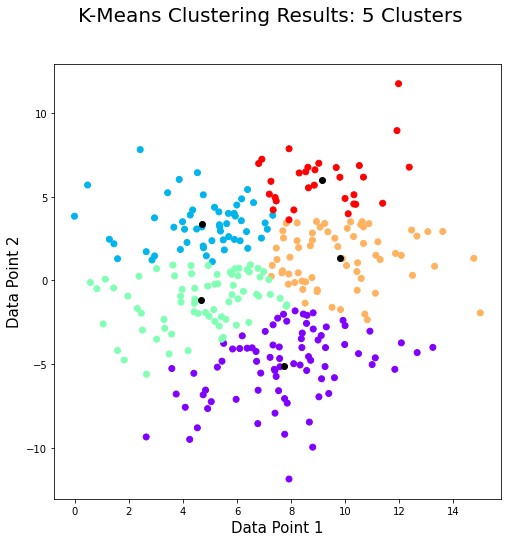

   Data_Point_1  Data_Point_2
0      7.750316     -5.085977
1      4.705337      3.356107
2      4.681519     -1.182962
3      9.828825      1.319996
4      9.157917      6.022389
     pred_labels
0              0
1              2
2              4
3              3
4              0
..           ...
295            2
296            1
297            4
298            2
299            0

[300 rows x 1 columns]


In [10]:
# Use Example of the created function [Numbers of Cluster = 5]
k_means_clustering(features, 5)


Converging centres:


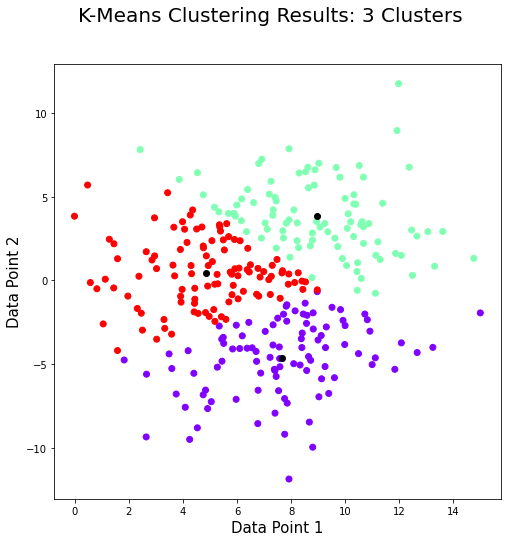

   Data_Point_1  Data_Point_2
0      7.652270     -4.645764
1      8.965994      3.831795
2      4.845052      0.449506
     pred_labels
0              0
1              0
2              1
3              0
4              0
..           ...
295            2
296            1
297            1
298            2
299            0

[300 rows x 1 columns]


In [12]:
# Use Example of the created function [Numbers of Cluster = 2]
k_means_clustering(features, 3)